<a href="https://colab.research.google.com/github/LakshmiSrikumar/Classifcation_Infosys_Internship_Oct2024/blob/main/Assignment_1%20(Lakshmi).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1 : Image Acquisition

In [ ]:
import cv2
import urllib.request
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# URL for  image
url = "https://imgshopnewgumlet.lbb.in/catalog/product/x/-/x-02-bx-j-020-e-1.jpg?fm=webp&w=750&h=500&dpr=1"
filename = "vase.png"

# Download the image
urllib.request.urlretrieve(url, filename)

# Load the image
image = Image.open(filename)

# Convert the image to a numpy array for processing
image_array = np.array(image)

# Step 2 : Edge Detection



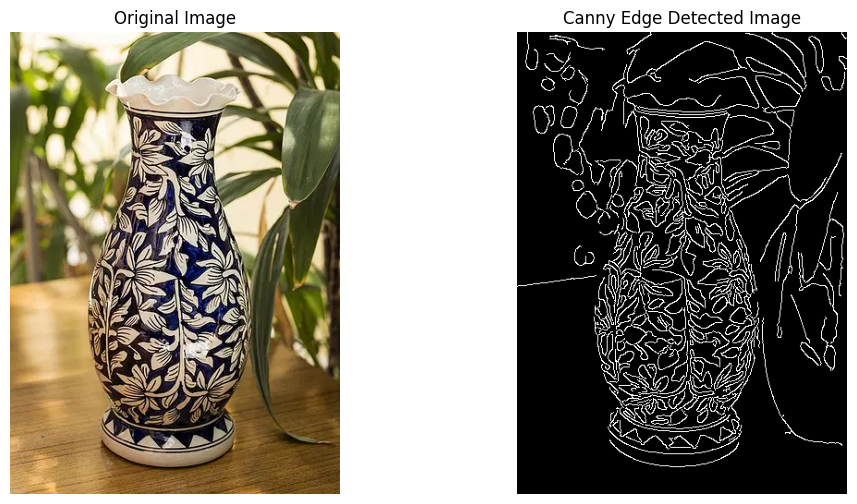

In [ ]:

# Apply Gaussian Blur to reduce noise
blurred_image = cv2.GaussianBlur(image_array, (5, 5), 1.4)

# Apply Canny Edge Detection
edges = cv2.Canny(blurred_image, 50, 300)

plt.figure(figsize=(12, 6))

# Plot the original image
plt.subplot(1, 2, 1)
plt.imshow(image_array, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Plot the Canny edge-detected image
plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detected Image')
plt.axis('off')

plt.show()


# Step 3 : Binary Conversion

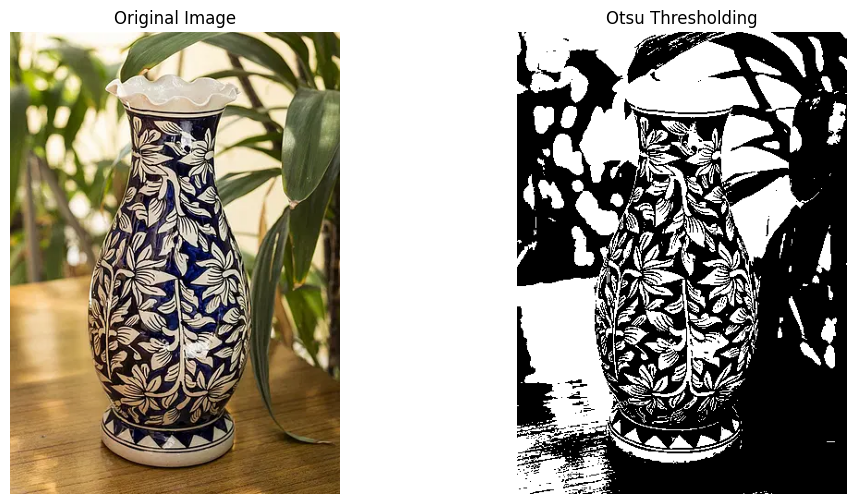

In [ ]:
image_array_gray = cv2.cvtColor(image_array, cv2.COLOR_BGR2GRAY)

otsu_threshold, binary_image = cv2.threshold(image_array_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.figure(figsize=(12, 6))

# Plot the Canny edge-detected image
plt.subplot(1, 2, 1)
plt.imshow(image_array, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Plot the otsu thresholding image
plt.subplot(1, 2, 2)
plt.imshow(binary_image,cmap='gray')
plt.title('Otsu Thresholding')
plt.axis('off')

plt.show()

# Step 4 : Binary Image Preprocessing

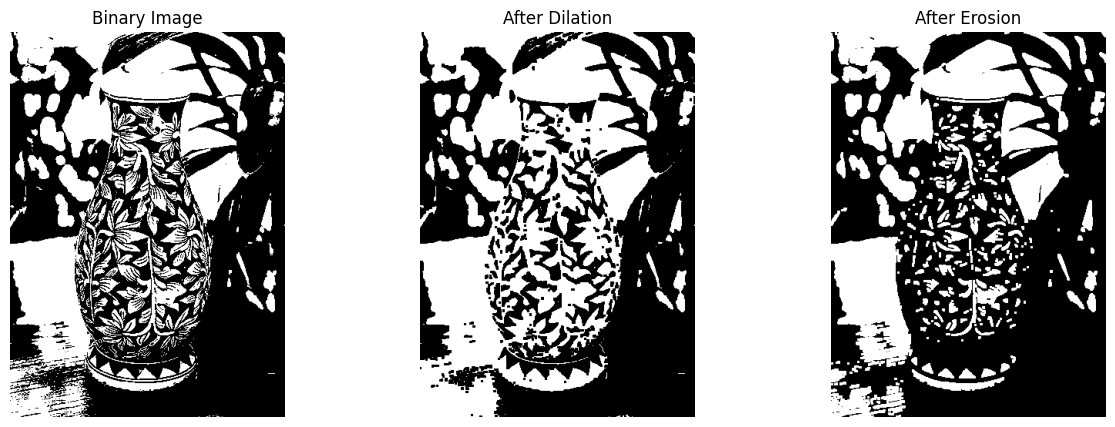

In [ ]:
# Define a kernel for morphological operations
kernel = np.ones((3,3), np.uint8)  # 3x3 square kernel

# Dilation
closed_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)

# Erosion
opened_image = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)

# Plot the results
plt.figure(figsize=(15, 5))

# Original binary image
plt.subplot(1, 3, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image')
plt.axis('off')

# After Dilation
plt.subplot(1, 3, 2)
plt.imshow(closed_image, cmap='gray')
plt.title('After Dilation')
plt.axis('off')

# After Erosion
plt.subplot(1, 3, 3)
plt.imshow(opened_image, cmap='gray')
plt.title('After Erosion')
plt.axis('off')

plt.show()

# Step 5 : Boundary Detection

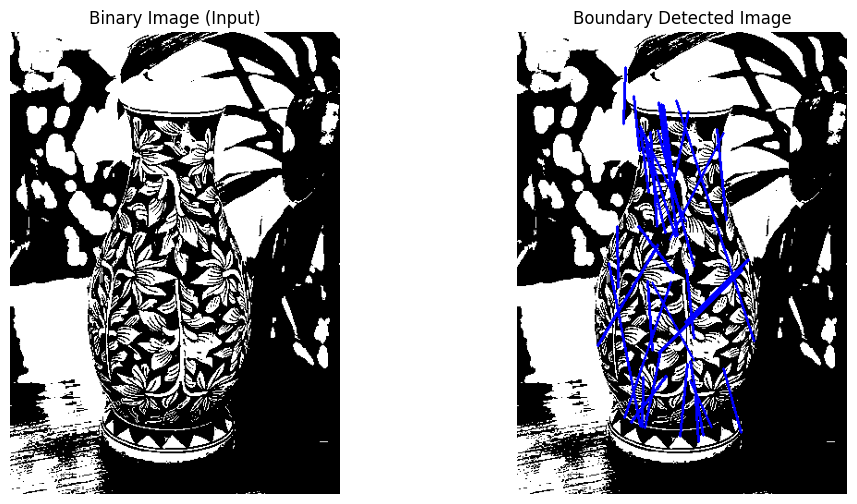

In [ ]:
# Apply Hough Line Transform
lines = cv2.HoughLinesP(edges, rho=1, theta=np.pi/180, threshold=100, minLineLength=50, maxLineGap=10)

# Create a copy of the original image (assuming a grayscale input)
output_image = cv2.cvtColor(binary_image, cv2.COLOR_GRAY2BGR)  # Convert binary to BGR for color lines

# Draw detected lines on the image
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]  # Extract line endpoints
        cv2.line(output_image, (x1, y1), (x2, y2), (0, 0, 255), 2)  # Red lines with thickness 2

# Plot the results
plt.figure(figsize=(12, 6))

# Original Binary Image
plt.subplot(1, 2, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image (Input)')
plt.axis('off')

# Image with Detected Boundaries
plt.subplot(1, 2, 2)
plt.imshow(output_image)
plt.title('Boundary Detected Image')
plt.axis('off')

plt.show()

# Step 6 : Output

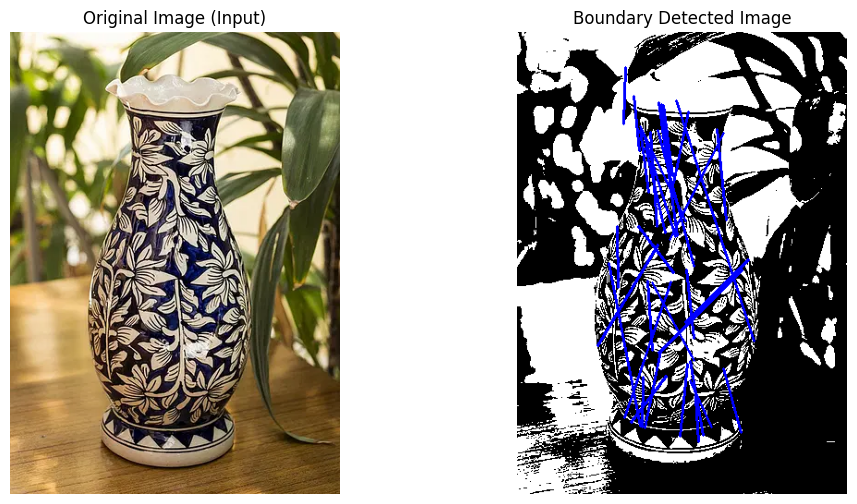

In [ ]:
# Plot the results
plt.figure(figsize=(12, 6))

# Original Image Image
plt.subplot(1, 2, 1)
plt.imshow(image_array, cmap='gray')
plt.title('Original Image (Input)')
plt.axis('off')

# Image with Detected Boundaries
plt.subplot(1, 2, 2)
plt.imshow(output_image)
plt.title('Boundary Detected Image')
plt.axis('off')

plt.show()